<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Machine-learning-handson/blob/main/Taiwan_outliers%2Cinfluence_and_leverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt


In [5]:
taiwan = pd.read_csv('/content/taiwan_real_estate2.csv')
print(taiwan.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


In [6]:
X='dist_to_mrt_m'
y='price_twd_msq'

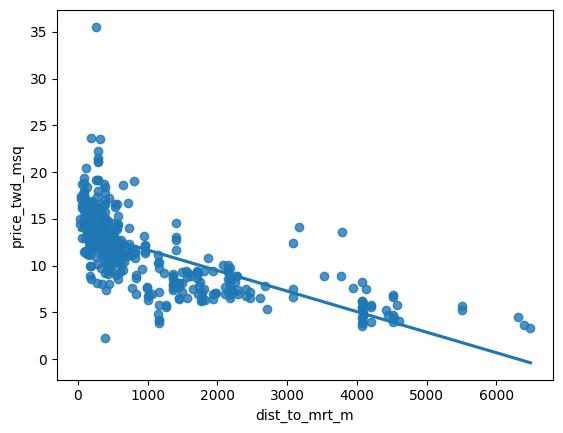

In [9]:
#visualize

sns.regplot(x='dist_to_mrt_m', y='price_twd_msq',data=taiwan,ci=None)
plt.show()

outliners(leverages and influences)

In [14]:
price_vs_dist = ols('price_twd_msq ~ dist_to_mrt_m',data=taiwan).fit()

summary_info = price_vs_dist.get_influence().summary_frame()
taiwan['leverage'] = summary_info['hat_diag']
print((taiwan.sort_values('leverage', ascending = False)).head())


     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  leverage
347       6488.021              1        15 to 30       3.388805  0.046808
116       6396.283              1        30 to 45       3.691377  0.045313
249       6306.153              1        15 to 30       4.538578  0.043870
255       5512.038              1        30 to 45       5.264750  0.032221
8         5512.038              1        30 to 45       5.688351  0.032221


In [15]:
#Cook distance

summary_info = price_vs_dist.get_influence().summary_frame()
taiwan['cooks_dist'] = summary_info['cooks_d']
print((taiwan.sort_values('cooks_dist', ascending = False)).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  leverage  cooks_dist
270       252.5822              1         0 to 15      35.552194  0.003466    0.092948
249      6306.1530              1        15 to 30       4.538578  0.043870    0.052859
148      3780.5900              0        15 to 30      13.645991  0.013470    0.048675
116      6396.2830              1        30 to 45       3.691377  0.045313    0.040168
347      6488.0210              1        15 to 30       3.388805  0.046808    0.039480
